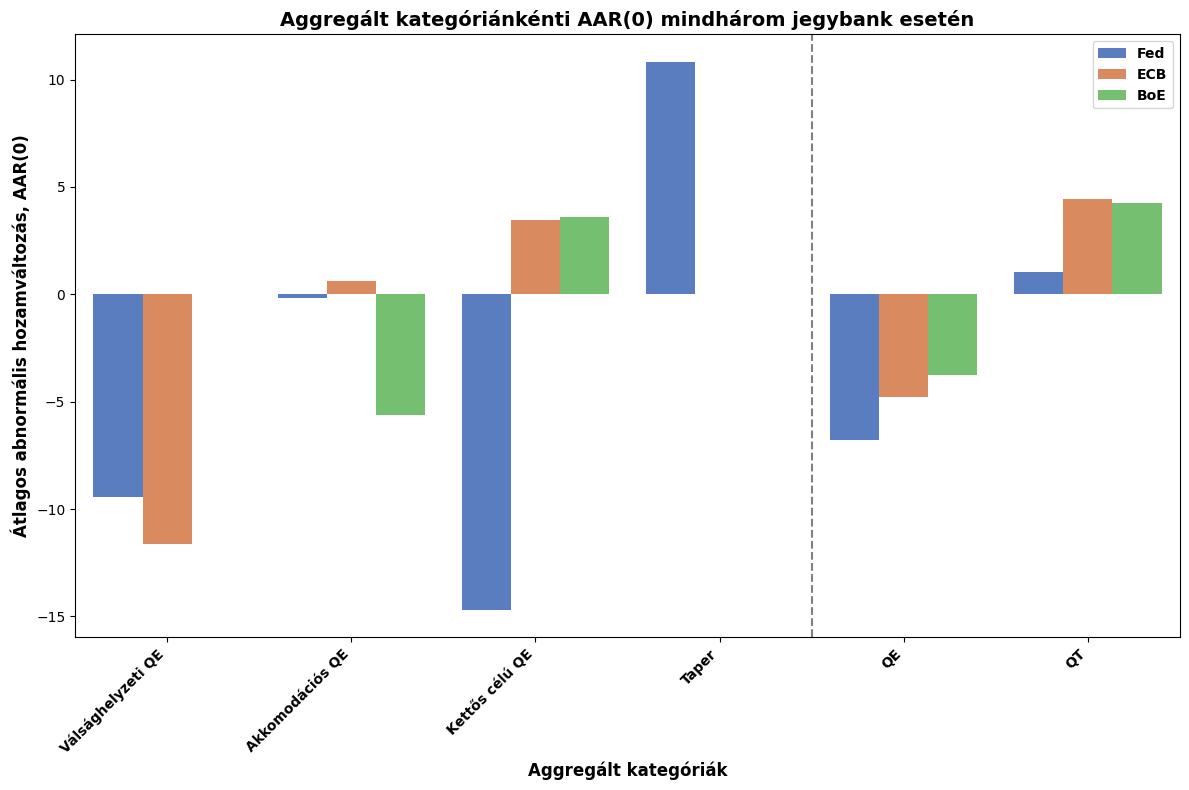

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/Users/szonyid/Desktop/TDK_2024/Data/All_CB.xlsx"
df = pd.read_excel(file_path)

# Set up the plot
plt.figure(figsize=(12, 8))

# Determine color based on significance of AAR(0) values
colors = ['red' if p_val <= 0.05 else 'blue' for p_val in df['p-value']]

# Create a bar plot
ax = sns.barplot(data=df, x='Aggregated Category', y='AAR(0)', hue='Central Bank', palette='muted', dodge=True)

# Add annotations for QE and QT values
for p in ax.patches:
    if p.get_height() != 0 and p.get_x() in [2, 5]:  # Check if the bar corresponds to QE or QT
        height = p.get_height()
        ax.annotate(f"{height:.2f}", (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom' if height > 0 else 'top', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Add vertical line between "Taper" and "QE"
ax.axvline(x=3.5, color='gray', linestyle='--')

# Customize labels and title
plt.xlabel('Aggregált kategóriák', fontsize=12, fontweight='bold')
plt.ylabel('Átlagos abnormális hozamváltozás, AAR(0)', fontsize=12, fontweight='bold')
plt.title('Aggregált kategóriánkénti AAR(0) mindhárom jegybank esetén', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold', fontsize = "10")  # Bold x-axis tick labels

# Show significant AAR(0) values in legend
legend = plt.legend(fontsize='10')
for text in legend.get_texts():
    text.set_fontweight('bold')  # Bold legend text

# Show plot
plt.tight_layout()
#plt.savefig("All_CB.png")
plt.show()

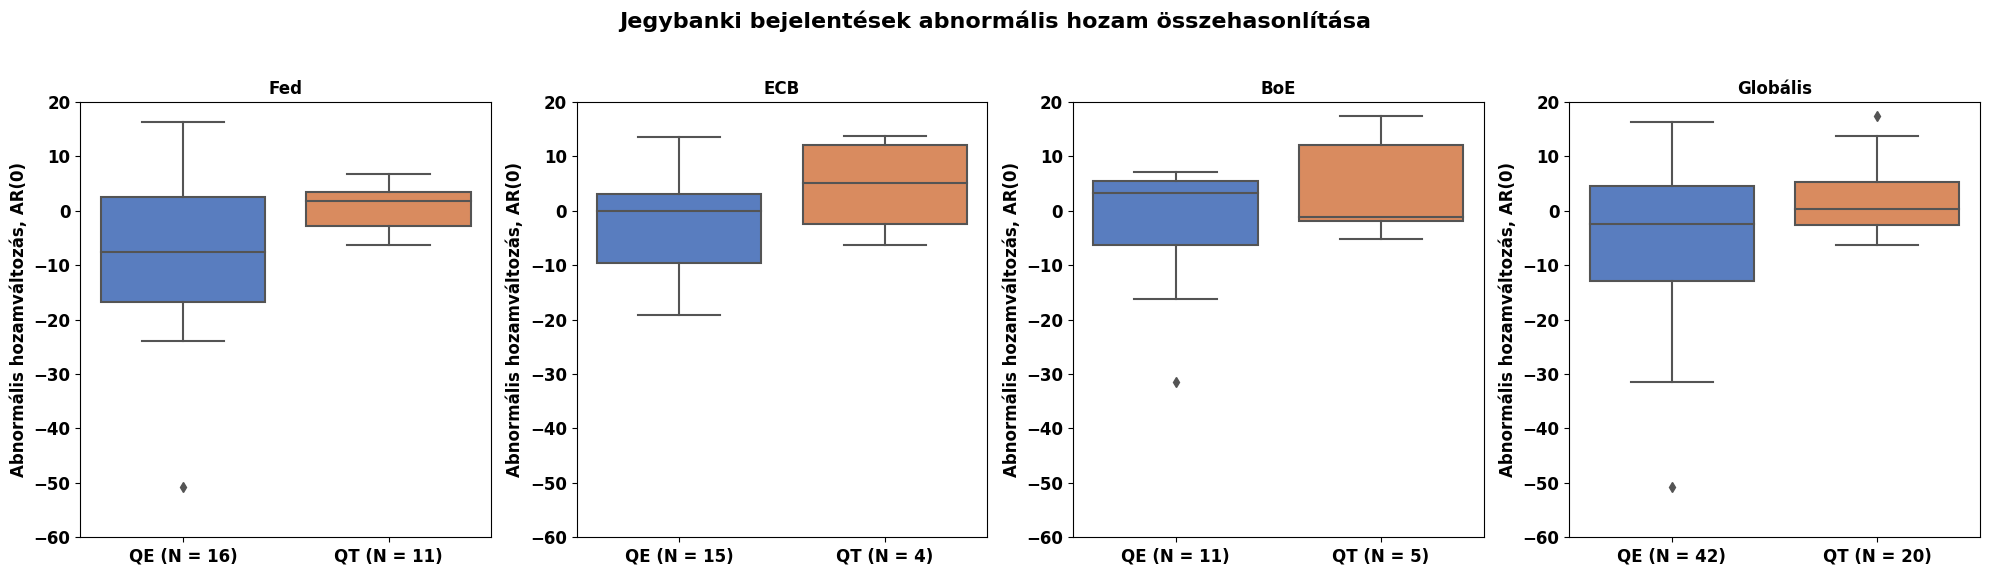

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data from the Excel file
file_path = "/Users/szonyid/Desktop/TDK_2024/Data/All_CB_Returns.xlsx"
df = pd.read_excel(file_path)

# Reshape the DataFrame to combine QE and QT returns into a single column
melted_df = pd.melt(df, id_vars=['Central Bank'], var_name='Category', value_name='Returns')

# Filter data for each central bank
fed_data = melted_df[melted_df['Central Bank'] == 'Fed']
ecb_data = melted_df[melted_df['Central Bank'] == 'ECB']
boe_data = melted_df[melted_df['Central Bank'] == 'BoE']

# Calculate aggregated data for "Global" category
global_data = melted_df.groupby('Category')['Returns'].agg(list).to_frame().reset_index()
global_data['Central Bank'] = 'Global'

# Combine the "Global" data with individual central bank data
combined_data = pd.concat([fed_data, ecb_data, boe_data, global_data])

# Flatten the lists in the "Returns" column
combined_data['Returns'] = combined_data['Returns'].apply(lambda x: np.nan if isinstance(x, list) else x)
combined_data = combined_data.dropna()

# Determine the y-axis limits for all subplots
y_min = -60
y_max = 20

# Define the number of events for each category manually
events_counts = {'Fed QE': 16, 'Fed QT': 11, 'ECB QE': 15, 'ECB QT': 4, 'BoE QE': 11, 'BoE QT': 5, 'QE': 42, 'QT': 20}

# Plot violin plots for each central bank and the aggregated "Global" category
fig, axes = plt.subplots(ncols=4, figsize=(20, 6))

# Plot Fed data
sns.boxplot(data=fed_data, x='Category', y='Returns', ax=axes[0], palette='muted')
axes[0].set_title('Fed')
axes[0].set_ylim(y_min, y_max)  # Set y-axis limits
axes[0].set_xticklabels(['QE (N = {})'.format(events_counts['Fed QE']), 'QT (N = {})'.format(events_counts['Fed QT'])])

# Plot ECB data
sns.boxplot(data=ecb_data, x='Category', y='Returns', ax=axes[1], palette='muted')
axes[1].set_title('ECB')
axes[1].set_ylim(y_min, y_max)  # Set y-axis limits
axes[1].set_xticklabels(['QE (N = {})'.format(events_counts['ECB QE']), 'QT (N = {})'.format(events_counts['ECB QT'])])

# Plot BoE data
sns.boxplot(data=boe_data, x='Category', y='Returns', ax=axes[2], palette='muted')
axes[2].set_title('BoE')
axes[2].set_ylim(y_min, y_max)  # Set y-axis limits
axes[2].set_xticklabels(['QE (N = {})'.format(events_counts['BoE QE']), 'QT (N = {})'.format(events_counts['BoE QT'])])

# Reshape global_data DataFrame
global_df = global_data.set_index('Category')['Returns'].apply(pd.Series).reset_index()

# Melt the DataFrame to convert it to long format
global_df = global_df.melt(id_vars='Category', value_name='Returns')

# Drop rows with non-numeric values in the "Returns" column
global_df = global_df[global_df['Returns'].apply(lambda x: isinstance(x, (int, float)))]

# Plot Global data
sns.boxplot(data=global_df, x='Category', y='Returns', ax=axes[3], palette='muted')
axes[3].set_title('Globális')
axes[3].set_ylim(y_min, y_max)  # Set y-axis limits
axes[3].set_xticklabels(['QE (N = {})'.format(events_counts['QE']), 'QT (N = {})'.format(events_counts['QT'])])

# Remove x-axis labels
for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('Abnormális hozamváltozás, AR(0)')

# Add a title to the plot
plt.suptitle("Jegybanki bejelentések abnormális hozam összehasonlítása", fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


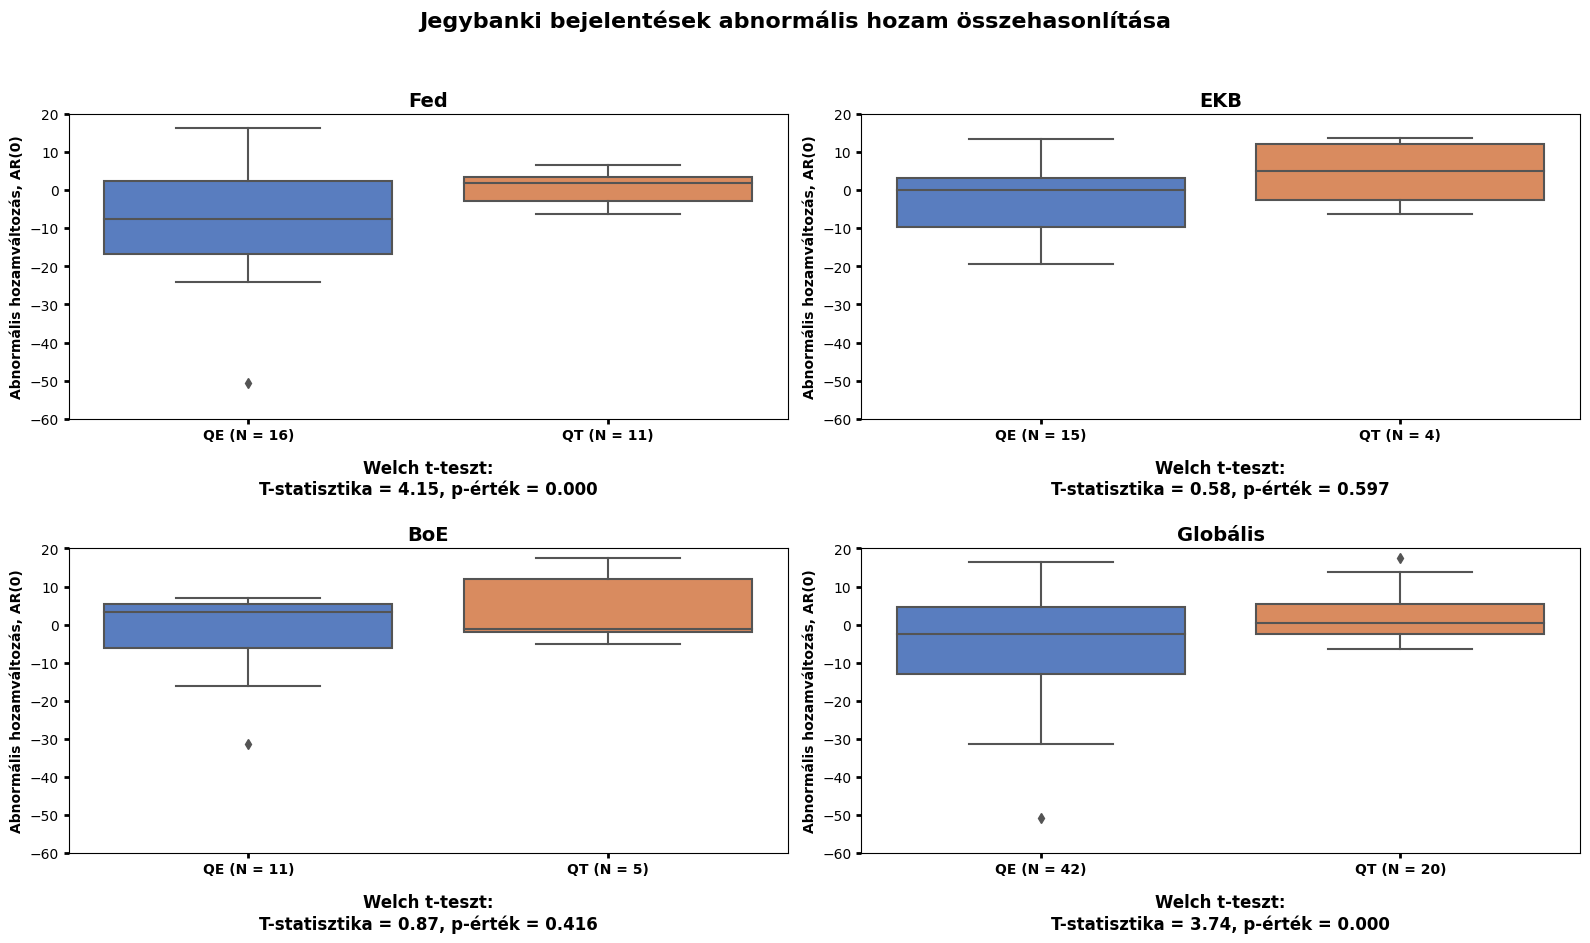

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data from the Excel file
file_path = "/Users/szonyid/Desktop/TDK_2024/Data/All_CB_Returns.xlsx"
df = pd.read_excel(file_path)

# Reshape the DataFrame to combine QE and QT returns into a single column
melted_df = pd.melt(df, id_vars=['Central Bank'], var_name='Category', value_name='Returns')

# Filter data for each central bank
fed_data = melted_df[melted_df['Central Bank'] == 'Fed']
ecb_data = melted_df[melted_df['Central Bank'] == 'ECB']
boe_data = melted_df[melted_df['Central Bank'] == 'BoE']

# Calculate aggregated data for "Global" category
global_data = melted_df.groupby('Category')['Returns'].agg(list).to_frame().reset_index()
global_data['Central Bank'] = 'Global'

# Combine the "Global" data with individual central bank data
combined_data = pd.concat([fed_data, ecb_data, boe_data, global_data])

# Flatten the lists in the "Returns" column
combined_data['Returns'] = combined_data['Returns'].apply(lambda x: np.nan if isinstance(x, list) else x)
combined_data = combined_data.dropna()

# Define the number of events for each category manually
events_counts = {'Fed QE': 16, 'Fed QT': 11, 'ECB QE': 15, 'ECB QT': 4, 'BoE QE': 11, 'BoE QT': 5, 'QE': 42, 'QT': 20}

# Determine the y-axis limits for all subplots
y_min = -60
y_max = 20

# Plot violin plots for each central bank and the aggregated "Global" category
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Plot Fed data
sns.boxplot(data=fed_data, x='Category', y='Returns', ax=axes[0, 0], palette='muted')
axes[0, 0].set_title('Fed', fontsize=14, fontweight='bold')  # Increase font size
axes[0, 0].set_xticklabels(['QE (N = {})'.format(events_counts['Fed QE']), 'QT (N = {})'.format(events_counts['Fed QT'])], fontweight='bold')  # Set x-tick labels to bold
axes[0, 0].set_ylim(y_min, y_max)  # Set y-axis limits
axes[0, 0].tick_params(axis='both', which='major', labelsize=10, width=2)  # Increase size and width of ticks
axes[0, 0].tick_params(axis='y', labelsize=10)  # Increase size of y-axis ticks

# Plot ECB data
sns.boxplot(data=ecb_data, x='Category', y='Returns', ax=axes[0, 1], palette='muted')
axes[0, 1].set_title('EKB', fontsize=14, fontweight='bold')  # Increase font size
axes[0, 1].set_xticklabels(['QE (N = {})'.format(events_counts['ECB QE']), 'QT (N = {})'.format(events_counts['ECB QT'])], fontweight='bold')  # Set x-tick labels to bold
axes[0, 1].set_ylim(y_min, y_max)  # Set y-axis limits
axes[0, 1].tick_params(axis='both', which='major', labelsize=10, width=2)  # Increase size and width of ticks
axes[0, 1].tick_params(axis='y', labelsize=10)  # Increase size of y-axis ticks

# Plot BoE data
sns.boxplot(data=boe_data, x='Category', y='Returns', ax=axes[1, 0], palette='muted')
axes[1, 0].set_title('BoE', fontsize=14, fontweight='bold')  # Increase font size
axes[1, 0].set_xticklabels(['QE (N = {})'.format(events_counts['BoE QE']), 'QT (N = {})'.format(events_counts['BoE QT'])], fontweight='bold')  # Set x-tick labels to bold
axes[1, 0].set_ylim(y_min, y_max)  # Set y-axis limits
axes[1, 0].tick_params(axis='both', which='major', labelsize=10, width=2)  # Increase size and width of ticks
axes[1, 0].tick_params(axis='y', labelsize=10)  # Increase size of y-axis ticks

# Reshape global_data DataFrame
global_df = global_data.set_index('Category')['Returns'].apply(pd.Series).reset_index()

# Melt the DataFrame to convert it to long format
global_df = global_df.melt(id_vars='Category', value_name='Returns')

# Drop rows with non-numeric values in the "Returns" column
global_df = global_df[global_df['Returns'].apply(lambda x: isinstance(x, (int, float)))]

# Plot Global data
sns.boxplot(data=global_df, x='Category', y='Returns', ax=axes[1, 1], palette='muted')
axes[1, 1].set_title('Globális', fontsize=14, fontweight='bold')  # Increase font size
axes[1, 1].set_xticklabels(['QE (N = {})'.format(events_counts['QE']), 'QT (N = {})'.format(events_counts['QT'])], fontweight='bold')  # Set x-tick labels to bold
axes[1, 1].set_ylim(y_min, y_max)  # Set y-axis limits
axes[1, 1].tick_params(axis='both', which='major', labelsize=10, width=2)  # Increase size and width of ticks
axes[1, 1].tick_params(axis='y', labelsize=10)  # Increase size of y-axis ticks

# Remove x-axis labels
for ax in axes.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('Abnormális hozamváltozás, AR(0)', fontweight='bold')  # Make y-axis labels bold

# Add a title to the plot
plt.suptitle("Jegybanki bejelentések abnormális hozam összehasonlítása", fontsize=16, fontweight='bold')

# Manually add test results for each subplot
test_results = {
    'Fed': "Welch t-teszt:\nT-statisztika = 4.15, p-érték = 0.000",
    'EKB': "Welch t-teszt:\nT-statisztika = 0.58, p-érték = 0.597",
    'BoE': "Welch t-teszt:\nT-statisztika = 0.87, p-érték = 0.416",
    'Globális': "Welch t-teszt:\nT-statisztika = 3.74, p-érték = 0.000"
}

# Add the test results as annotations on the plots
for (i, j), ax in np.ndenumerate(axes):
    ax.annotate(test_results[ax.get_title()], xy=(0.5, -0.25), xycoords='axes fraction',
                ha='center', fontsize=12, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig("All_CB_Boxplots_2x2.png")
plt.show()


In [182]:
# Filter QE and QT returns
qe_returns = global_df[global_df['Category'] == 'QE']['Returns']
qt_returns = global_df[global_df['Category'] == 'QT']['Returns']

# Drop NaN values
qe_returns = qe_returns.dropna()
qt_returns = qt_returns.dropna()

# Convert the returns to lists
qe_abnormal_returns = qe_returns.tolist()
qt_abnormal_returns = qt_returns.tolist()

# Calculate the sample sizes and means for each group
n_qe = len(qe_abnormal_returns)
n_qt = len(qt_abnormal_returns)

# Take the absolute values for QE, to have the same sign as of QT
qe_abs_abnormal_returns = np.abs(qe_abnormal_returns)

# Calculate the mean aggregated abnormal returns for QE and QT
mean_qe = np.mean(qe_abs_abnormal_returns)
mean_qt = np.mean(qt_abnormal_returns)

# Calculate the unbiased estimators of the variances
var_qe = np.var(qe_abs_abnormal_returns, ddof=1)
var_qt = np.var(qt_abnormal_returns, ddof=1)

# Calculate the degrees of freedom
numerator = (var_qe / n_qe + var_qt / n_qt) ** 2
denominator = (var_qe ** 2 / (n_qe ** 2 * (n_qe - 1))) + (var_qt ** 2 / (n_qt ** 2 * (n_qt - 1)))
degrees_of_freedom = numerator / denominator

# Calculate the t-statistic
welch_t_statistic = (mean_qe - mean_qt) / np.sqrt((var_qe / n_qe) + (var_qt / n_qt))

# Calculate the p-value
welch_p_value = 2 * (1 - stats.t.cdf(abs(welch_t_statistic), df=degrees_of_freedom))

# Print results
print("Welch's t-test between QE and QT:")
print(f"t-statistic: {welch_t_statistic}")
print(f"p-value: {welch_p_value}")

Welch's t-test between QE and QT:
t-statistic: 3.736205483932656
p-value: 0.00048220334633986006
